![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [449]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный инструмент для формирования dummies из данных, представленных в виде списка:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [450]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [451]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [452]:
DATA_DIR = ''
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')

In [453]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [454]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [455]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [456]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [457]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [458]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [459]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [461]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
21153,id_4865,Berlin,['Mexican'],4867.0,$$ - $$$,41.0,"[['The best Margarita', 'Snack what?'], ['05/3...",/Restaurant_Review-g187323-d10064140-Reviews-L...,d10064140,1,3.5
40850,id_5075,Milan,['Italian'],5078.0,$$ - $$$,3.0,"[['Cool place'], ['07/24/2017']]",/Restaurant_Review-g187849-d12010952-Reviews-I...,d12010952,1,3.5
46725,id_4493,Barcelona,"['Bar', 'Pub', 'Spanish']",4494.0,$$ - $$$,43.0,"[['Below average', 'Decent'], ['11/13/2016', '...",/Restaurant_Review-g187497-d4913328-Reviews-Ba...,d4913328,1,4.0
7519,id_7519,Geneva,"['International', 'European', 'Vegetarian Frie...",619.0,$$ - $$$,47.0,"[['Very nice food', 'Nice location'], ['01/03/...",/Restaurant_Review-g188057-d1233251-Reviews-Pa...,d1233251,0,0.0
12169,id_1313,London,"['British', 'Vegetarian Friendly', 'Gluten Fre...",1315.0,$$ - $$$,126.0,"[['A hidden gem', 'Great find'], ['12/12/2017'...",/Restaurant_Review-g186338-d9994570-Reviews-Na...,d9994570,1,4.5


In [462]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Приведем названия колонок в датасете к единому формату для удобства последующей работы

In [463]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [464]:
data.columns = ['restaurant_id','city','cuisine_style','ranking','price_range','number_of_reviews','reviews','url_ta','id_ta','sample','rating']

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   


## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, даже отсутствие информации может быть важным признаком! Проверим, какие из столбцов содержат пропуски.

In [465]:
data.isna().sum()

restaurant_id            0
city                     0
cuisine_style        11590
ranking                  0
price_range          17361
number_of_reviews     3200
reviews                  2
url_ta                   0
id_ta                    0
sample                   0
rating                   0
dtype: int64

Для каждого из столбцов выберем свой способ заполнения пропусков. Прежде всего важно заполнить пропуски в числовых признаках, к которым относится, например, количество отзывов number_of_reviews.

In [466]:
display(data.number_of_reviews.describe())
display(data.number_of_reviews.value_counts())
display(data.number_of_reviews.isna().sum())

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: number_of_reviews, Length: 1573, dtype: int64

3200

В этом случае пропуски могут означать отсутствие отзывов, поэтому заменим пропуски на 0.

In [467]:
data.number_of_reviews.fillna(0, inplace=True)
display(data.number_of_reviews.describe())
display(data.number_of_reviews.value_counts())

count    50000.000000
mean       116.505040
std        286.173104
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

0.0       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: number_of_reviews, Length: 1574, dtype: int64

Признак уровня цен price_range не является числовым, а количество пропусков в данном параметре существенное (более 30% от общего количества записей в датасете), т.е. исключать их из анализа некорректно.

In [468]:
display(data.price_range.describe())
display(data.price_range.value_counts())
display(data.price_range.isna().sum())

count        32639
unique           3
top       $$ - $$$
freq         23041
Name: price_range, dtype: object

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

17361

 При этом данный параметр может быть преобразован в числовые значения на следующем шаге, поэтому для пустых значений используем заполнение отдельным значением '0$', чтобы учесть его в последующей обработке.

In [469]:
data.price_range.fillna('0$', inplace=True) 
display(data.price_range.describe())
display(data.price_range.value_counts())
display(data.price_range.isna().sum())

count        50000
unique           4
top       $$ - $$$
freq         23041
Name: price_range, dtype: object

$$ - $$$    23041
0$          17361
$            7816
$$$$         1782
Name: price_range, dtype: int64

0

Признак предлагаемой кухни cuisine_style заполнен текстовыми значениями, причем зачастую это набор из нескольких текстовых значений. Кроме того, количество пропусков существенно (превышает 20% от общего количества записей в датасете).

In [470]:
display(data.cuisine_style.describe())
display(data.cuisine_style.value_counts())
display(data.cuisine_style.isna().sum())

count           38410
unique          10731
top       ['Italian']
freq             1332
Name: cuisine_style, dtype: object

['Italian']                                                                       1332
['French']                                                                        1019
['Spanish']                                                                        860
['French', 'European']                                                             503
['Cafe']                                                                           500
                                                                                  ... 
['Barbecue', 'European', 'Hungarian']                                                1
['Bar', 'Pizza', 'European', 'Pub', 'Slovenian', 'Central European']                 1
['French', 'Wine Bar', 'Delicatessen', 'Vegetarian Friendly', 'Vegan Options']       1
['Pizza', 'Spanish', 'Italian', 'Mediterranean']                                     1
['European', 'Austrian', 'International']                                            1
Name: cuisine_style, Length: 10731, dtype: 

11590

С учетом этого, для пустых значений используем заполнение отдельным значением 'NoInfo', чтобы учесть его в последующей обработке.

In [471]:
data.cuisine_style.fillna('Other', inplace=True) 
display(data.cuisine_style.describe())
display(data.cuisine_style.value_counts())
display(data.cuisine_style.isna().sum())

count     50000
unique    10732
top       Other
freq      11590
Name: cuisine_style, dtype: object

Other                                                                                                                         11590
['Italian']                                                                                                                    1332
['French']                                                                                                                     1019
['Spanish']                                                                                                                     860
['French', 'European']                                                                                                          503
                                                                                                                              ...  
['Cafe', 'European', 'Turkish', 'Vegetarian Friendly', 'Vegan Options']                                                           1
['Italian', 'Middle Eastern', 'International', 'Gastropub', 'Vegetarian Frie

0

Признак reviews заполнен последними текстами и датами отзывов. Причем в данном списке немного пропусков, но большое количество пустых значений '[[], []]'. Кроме того, количество пропусков не существенно (всего 2 записи в датасете). 

In [472]:
display(data.reviews.describe())
display(data.reviews.value_counts())
display(data.reviews.isna().sum())

count        49998
unique       41857
top       [[], []]
freq          8112
Name: reviews, dtype: object

[[], []]                                                                                                                              8112
[['Excellent'], ['09/03/2015']]                                                                                                          2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]                                           2
[['Very average food. Over average prices.', 'great food with great service!'], ['11/17/2017', '08/17/2017']]                            2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]                             2
                                                                                                                                      ... 
[['Excellent, food for a fair price', 'Great food'], ['06/15/2017', '04/22/2017']]                                                       1
[['Nice to stop by', 'Will 

2

С учетом этого, для пустых значений используем заполнение наиболее встречающимся значением mode.

In [473]:
data.reviews.fillna(data.reviews.mode()[0],inplace=True) 
display(data.reviews.describe())
display(data.reviews.value_counts())
display(data.reviews.isna().sum())

count        50000
unique       41857
top       [[], []]
freq          8114
Name: reviews, dtype: object

[[], []]                                                                                                                              8114
[['Excellent'], ['09/03/2015']]                                                                                                          2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]                                           2
[['Very average food. Over average prices.', 'great food with great service!'], ['11/17/2017', '08/17/2017']]                            2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]                             2
                                                                                                                                      ... 
[['Excellent, food for a fair price', 'Great food'], ['06/15/2017', '04/22/2017']]                                                       1
[['Nice to stop by', 'Will 

0

In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      50000 non-null  object 
 1   city               50000 non-null  object 
 2   cuisine_style      50000 non-null  object 
 3   ranking            50000 non-null  float64
 4   price_range        50000 non-null  object 
 5   number_of_reviews  50000 non-null  float64
 6   reviews            50000 non-null  object 
 7   url_ta             50000 non-null  object 
 8   id_ta              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [475]:
display(data.nunique(dropna=False))
data

restaurant_id        13094
city                    31
cuisine_style        10732
ranking              12975
price_range              4
number_of_reviews     1574
reviews              41857
url_ta               49963
id_ta                49963
sample                   2
rating                  10
dtype: int64

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


Потенциально потребуют обработки следующие признаки:
    1. cuisine_style (126 уникальных значений) - преобразование в dummies
    2. city (31 уникальное значение) - преобразование в dummies, дополнение в датасет внешних данных о городах
    3. price_range (4 уникальных значения) - преобразование в последовательные числовые значения
    4. number_of_reviews - создание нового полиномиального признака (например, путем извлечения квадратного корня для нормализации/ сглаживания распределения значения признака)
    5. reviews - выделение информации о датах отзывов и их анализ
    6. ranking_vs_city_count - создание нового полиномиального признака

1. cuisine_style (126 уникальных значений) - преобразование в dummies
    - отфильтруем значения, убирая лишние знаки
    - сформируем dummies с использованием MultiLabelBinarizer
    - сформируем перечень ТОР40 cuisine_style, формирующих 90% выборки
    - удалим столбцы с кухнями, не соответвующими  

In [476]:
def filter_cuisine_style(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.strip()
    x = [style.strip() for style in x.split(',')]
    x = [style for style in x if len(style) > 0]
    return x

data['cuisine_style'] = data['cuisine_style'].apply(filter_cuisine_style)
data_cuisine_90 = data.explode(column='cuisine_style')
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('cuisine_style')), index=data.index, columns=mlb.classes_))
data

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,'Uzbek','Vegan Options','Vegetarian Friendly','Venezuelan','Vietnamese','Welsh','Wine Bar','Xinjiang','Yunnan',Other
0,id_0,Paris,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,1,1,0,0,0,0,0,0,0
2,id_2,Edinburgh,810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,id_3,London,1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,id_4,Bratislava,37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,1,1,0,0,0,0,0,0,0
49996,id_6340,Paris,6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,1,0,0,0,0,0,0,0
49997,id_1649,Stockholm,1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,0,0,0,0,0
49998,id_640,Warsaw,641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,1,0,0,0,0,0,0,0


In [477]:
data_cuisine_90 = data_cuisine_90[data_cuisine_90['cuisine_style'] != 'Other']
all_cuisine = data_cuisine_90['cuisine_style'].value_counts()
top_cuisine = all_cuisine.head(40).index
all_cuisine = data_cuisine_90['cuisine_style'].value_counts().index
cuisine_to_throw_away = list(set(all_cuisine) - set(top_cuisine))
len(cuisine_to_throw_away)

85

In [478]:
data.drop(cuisine_to_throw_away, axis = 1, inplace=True)
data.drop('Other', axis = 1, inplace=True)
data

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,'Seafood','Soups','Spanish','Steakhouse','Sushi','Thai','Vegan Options','Vegetarian Friendly','Vietnamese','Wine Bar'
0,id_0,Paris,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,id_2,Edinburgh,810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,id_3,London,1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,id_4,Bratislava,37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,1,1,0,0
49996,id_6340,Paris,6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,0,0,0,0,0,1,0,0
49997,id_1649,Stockholm,1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,1,0,0,0,0,0
49998,id_640,Warsaw,641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,1,0,0


2. city (31 уникальное значение) - преобразование в dummies

In [479]:
dummies_city = pd.get_dummies(data.city).rename(columns=lambda x: str(x))
data = pd.concat([data, dummies_city], axis=1)
data

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,Paris,6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,0,1,0,0,0,0,0,0
49997,id_1649,Stockholm,1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,0,1,0,0,0
49998,id_640,Warsaw,641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,0,1,0


2. city (31 уникальное значение) - дополнение в датасет внешних данных о городах
    - Добавим словарь с внешними данными о численности населения городов. Единицы  измерения -  тысячи человек. Данные взяты из википедии на 2019 год
    - Добавим новый признак численности населения city_count в городе в датасет

In [480]:
city_dict = {'London':8982,'Paris':2148,'Madrid':6642,'Barcelona':5575, 'Berlin':3769, 'Milan':1352,
            'Rome':2873, 'Prague':1309, 'Lisbon': 0.504718, 'Vienna':1897, 'Amsterdam': 0.821752,'Brussels': 0.174383, 'Budapest':1.752, 'Dublin': 1.388,
           'Copenhagen':0.602481,'Athens':0.664046,'Edinburgh':0.482005, 'Zurich':0.402762, 'Oporto':0.214349,'Geneva':0.499408,'Hamburg':1.899, 'Stockholm':0.975904, 'Munich':1.473, 'Warsaw':1.798,
             'Krakow':0.769498,'Lyon':0.513275,'Oslo':0.681067,'Helsinki':0.631695, 'Bratislava':0.422428,'Luxembourg':0.613894,'Ljubljana':0.279631}
display(city_dict)

data['city_count'] = data.city
data['city_count'] = data['city_count'].replace(to_replace=city_dict)
data

{'London': 8982,
 'Paris': 2148,
 'Madrid': 6642,
 'Barcelona': 5575,
 'Berlin': 3769,
 'Milan': 1352,
 'Rome': 2873,
 'Prague': 1309,
 'Lisbon': 0.504718,
 'Vienna': 1897,
 'Amsterdam': 0.821752,
 'Brussels': 0.174383,
 'Budapest': 1.752,
 'Dublin': 1.388,
 'Copenhagen': 0.602481,
 'Athens': 0.664046,
 'Edinburgh': 0.482005,
 'Zurich': 0.402762,
 'Oporto': 0.214349,
 'Geneva': 0.499408,
 'Hamburg': 1.899,
 'Stockholm': 0.975904,
 'Munich': 1.473,
 'Warsaw': 1.798,
 'Krakow': 0.769498,
 'Lyon': 0.513275,
 'Oslo': 0.681067,
 'Helsinki': 0.631695,
 'Bratislava': 0.422428,
 'Luxembourg': 0.613894,
 'Ljubljana': 0.279631}

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count
0,id_0,Paris,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,2148.000000
1,id_1,Helsinki,106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0.631695
2,id_2,Edinburgh,810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0.482005
3,id_3,London,1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,8982.000000
4,id_4,Bratislava,37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0.422428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,1352.000000
49996,id_6340,Paris,6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,1,0,0,0,0,0,0,2148.000000
49997,id_1649,Stockholm,1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,1,0,0,0,0.975904
49998,id_640,Warsaw,641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,1,0,1.798000


3. price_range (4 уникальных значения) - преобразование в последовательные числовые значения
    - заменим последовательными числами 0,1,2,3

In [481]:
price_dict = {'0$':0,'$':1,'$$ - $$$':2,'$$$$':3,}
data.price_range = data.price_range.replace(to_replace=price_dict)
display(data.price_range.value_counts())
data

2    23041
0    17361
1     7816
3     1782
Name: price_range, dtype: int64

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count
0,id_0,Paris,12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,2148.000000
1,id_1,Helsinki,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0.631695
2,id_2,Edinburgh,810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0.482005
3,id_3,London,1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,8982.000000
4,id_4,Bratislava,37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0.422428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,1352.000000
49996,id_6340,Paris,6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,1,0,0,0,0,0,0,2148.000000
49997,id_1649,Stockholm,1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,1,0,0,0,0.975904
49998,id_640,Warsaw,641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,1,0,1.798000


4. number_of_reviews - создание нового полиномиального признака
    - проанализируем значения признака и его распределение
    - протестируем возможность нормализации сглаживания распределения путем применения полиномиальных значений
    - создадим новый признак sqrt_number_of_reviews и добавим его в датасет

count    50000.000000
mean       116.505040
std        286.173104
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

(array([4.9145e+04, 6.6800e+02, 1.1200e+02, 4.0000e+01, 1.7000e+01,
        7.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0.,  966., 1932., 2898., 3864., 4830., 5796., 6762., 7728.,
        8694., 9660.]),
 <a list of 10 Patch objects>)

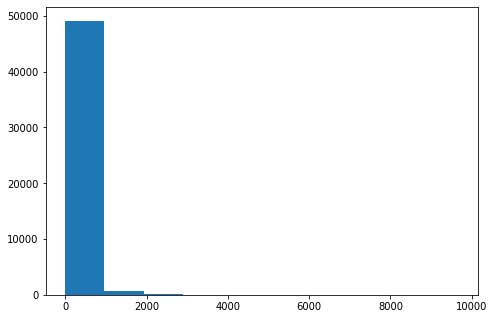

In [482]:
display(data.number_of_reviews.describe())

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data.number_of_reviews)

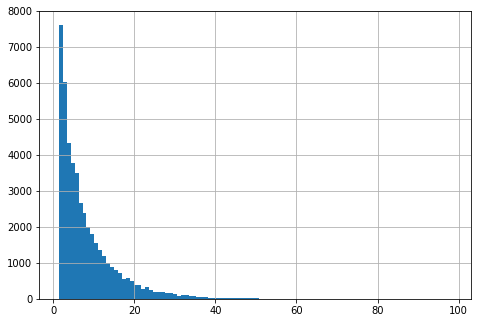

In [483]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
np.sqrt(data.number_of_reviews[data.number_of_reviews > 0]).hist(bins=100)

In [484]:
data['sqrt_number_of_reviews'] = round(np.sqrt(data.number_of_reviews[data.number_of_reviews >= 0]))
data

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews
0,id_0,Paris,12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,2148.000000,2.0
1,id_1,Helsinki,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0.631695,10.0
2,id_2,Edinburgh,810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0.482005,5.0
3,id_3,London,1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,8982.000000,14.0
4,id_4,Bratislava,37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0.422428,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,1352.000000,9.0
49996,id_6340,Paris,6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,1,0,0,0,0,0,0,2148.000000,23.0
49997,id_1649,Stockholm,1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,1,0,0,0,0.975904,2.0
49998,id_640,Warsaw,641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,1,0,1.798000,8.0


5. reviews - выделение информации о датах отзывов и их анализ
    - отфильтруем данные об отзывах (отсеим пустые данные при помощи функции)
    - выделим даты 1 и 2 отзывов, а также дельту во времени между ними
    - добавим dates_of_reviews, date_1, date_2 и timedelta в датасет
    - пустые значения timedelta заполним mode

In [485]:
def new_reviews(x):
    if x == '[[], []]':
        return []
    else:
        x = x.replace(']]', '')
        x = x.replace("'", '')
        x = x.split('], [')[1]
        x = x.split(', ')
        return x
data['dates_of_reviews'] = data['reviews'].apply(new_reviews)
data[['date_1', 'date_2']] = pd.DataFrame(data['dates_of_reviews'].tolist())

data['date_1'] = pd.to_datetime(data['date_1']).dt.date #Дата первого отзыва.
data['date_2'] = pd.to_datetime(data['date_2']).dt.date #Дата второго отзыва.
data['timedelta'] = data['date_1'] - data['date_2']

display(data.timedelta.describe())
display(data.timedelta.value_counts())
display(data.timedelta.isna().sum())
data

count                       36206
mean     124 days 17:32:20.297188
std      233 days 00:12:16.906120
min           -362 days +00:00:00
25%              13 days 00:00:00
50%              55 days 00:00:00
75%             157 days 00:00:00
max            3296 days 00:00:00
Name: timedelta, dtype: object

1 days       814
0 days       631
2 days       618
3 days       594
4 days       524
            ... 
1578 days      1
1960 days      1
1489 days      1
1555 days      1
1137 days      1
Name: timedelta, Length: 1650, dtype: int64

13794

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,dates_of_reviews,date_1,date_2,timedelta
0,id_0,Paris,12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,2148.000000,2.0,[],NaT,NaT,NaT
1,id_1,Helsinki,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0.631695,10.0,"[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,37 days
2,id_2,Edinburgh,810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0.482005,5.0,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,22 days
3,id_3,London,1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,8982.000000,14.0,"[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,14 days
4,id_4,Bratislava,37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0.422428,13.0,"[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,1352.000000,9.0,"[12/16/2017, 11/12/2017]",2017-12-16,2017-11-12,34 days
49996,id_6340,Paris,6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,0,0,2148.000000,23.0,"[12/21/2017, 12/12/2017]",2017-12-21,2017-12-12,9 days
49997,id_1649,Stockholm,1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,1,0,0,0,0.975904,2.0,"[11/03/2016, 04/12/2008]",2016-11-03,2008-04-12,3127 days
49998,id_640,Warsaw,641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,1,0,1.798000,8.0,"[07/11/2017, 06/18/2017]",2017-07-11,2017-06-18,23 days


In [487]:
data.timedelta.fillna(data.timedelta.mode()[0],inplace=True) 
display(data.timedelta.describe())
display(data.timedelta.value_counts())
display(data.timedelta.isna().sum())

count                       50000
mean      90 days 14:18:09.216000
std      205 days 20:18:47.696032
min           -362 days +00:00:00
25%               1 days 00:00:00
50%              20 days 00:00:00
75%             105 days 00:00:00
max            3296 days 00:00:00
Name: timedelta, dtype: object

1 days       14608
0 days         631
2 days         618
3 days         594
4 days         524
             ...  
3207 days        1
1063 days        1
1346 days        1
1561 days        1
1208 days        1
Name: timedelta, Length: 1650, dtype: int64

0

In [488]:
6. ranking_vs_city_count - создание нового полиномиального признака
    - проаналищируем соотношение ranking и city_count
    - создадим новый признак ranking_vs_city_count и добавим его в датасет

SyntaxError: invalid syntax (<ipython-input-488-45138e641092>, line 1)

(array([43363.,  3706.,  1317.,   683.,   241.,   138.,   134.,   145.,
          137.,   136.]),
 array([1.11333779e-04, 1.72379198e+03, 3.44758386e+03, 5.17137573e+03,
        6.89516760e+03, 8.61895947e+03, 1.03427513e+04, 1.20665432e+04,
        1.37903351e+04, 1.55141270e+04, 1.72379188e+04]),
 <a list of 10 Patch objects>)

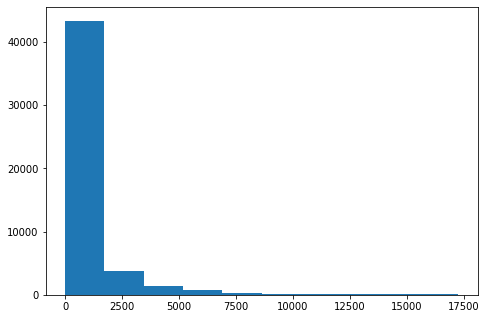

In [489]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data.ranking/data.city_count)

In [490]:
data['ranking_vs_city_count'] = data['ranking']/data['city_count']
data

,restaurant_id,city,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,dates_of_reviews,date_1,date_2,timedelta,ranking_vs_city_count
0,id_0,Paris,12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,2148.000000,2.0,[],NaT,NaT,1 days,6.034916
1,id_1,Helsinki,106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0.631695,10.0,"[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,37 days,167.802500
2,id_2,Edinburgh,810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0.482005,5.0,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,22 days,1680.480493
3,id_3,London,1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,8982.000000,14.0,"[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,14 days,0.185816
4,id_4,Bratislava,37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0.422428,13.0,"[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,15 days,87.588891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,1352.000000,9.0,"[12/16/2017, 11/12/2017]",2017-12-16,2017-11-12,34 days,0.369822
49996,id_6340,Paris,6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,0,2148.000000,23.0,"[12/21/2017, 12/12/2017]",2017-12-21,2017-12-12,9 days,2.952048
49997,id_1649,Stockholm,1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0.975904,2.0,"[11/03/2016, 04/12/2008]",2016-11-03,2008-04-12,3127 days,1692.789455
49998,id_640,Warsaw,641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,1,0,1.798000,8.0,"[07/11/2017, 06/18/2017]",2017-07-11,2017-06-18,23 days,356.507230


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

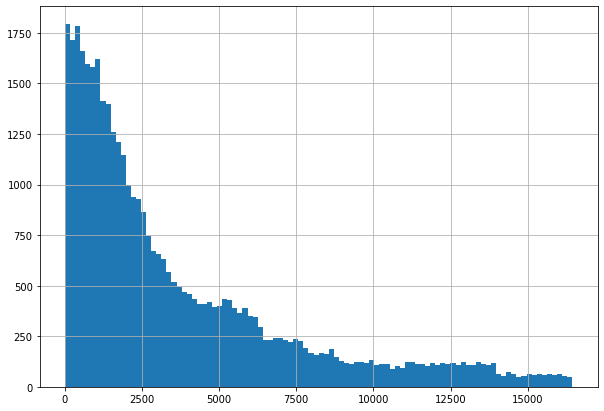

In [491]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

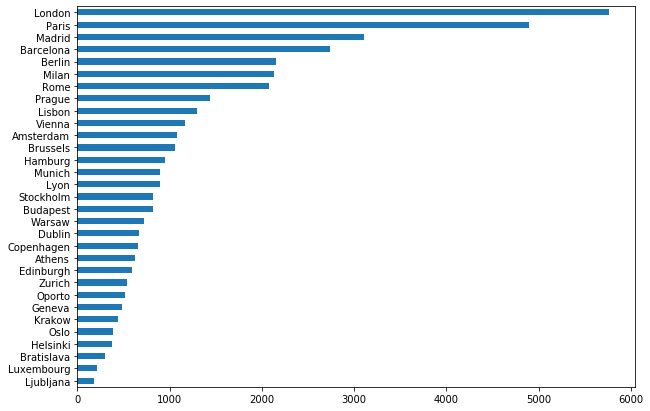

In [492]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

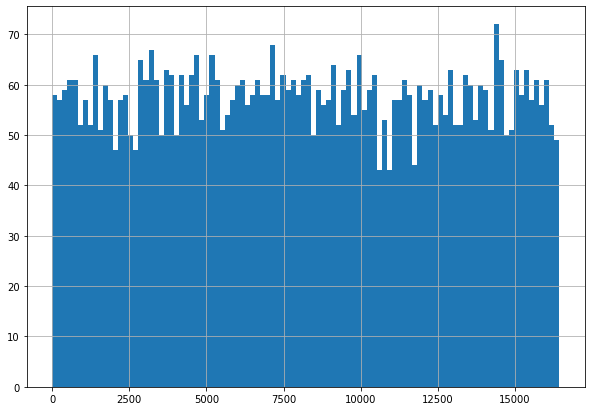

In [493]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

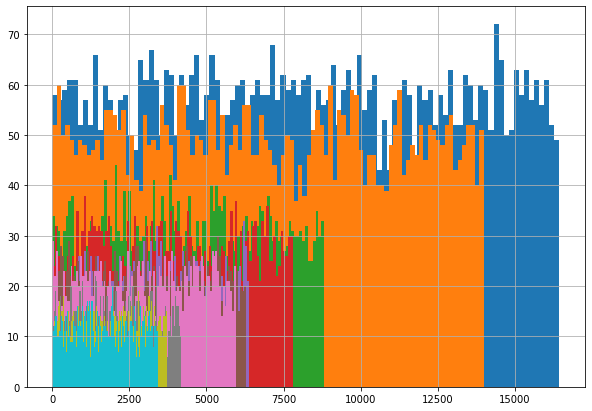

In [494]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

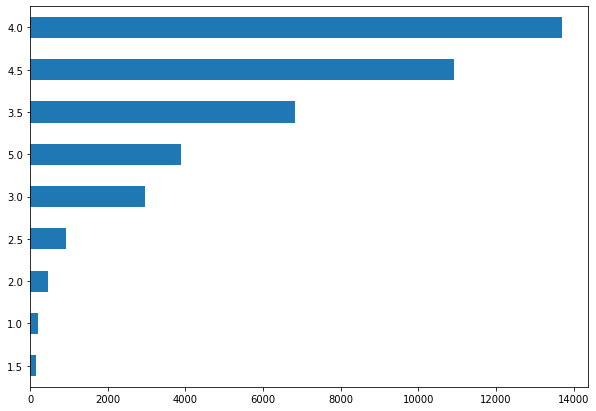

In [495]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

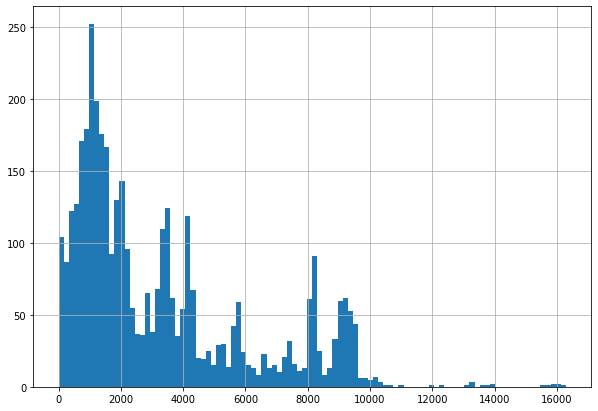

In [496]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

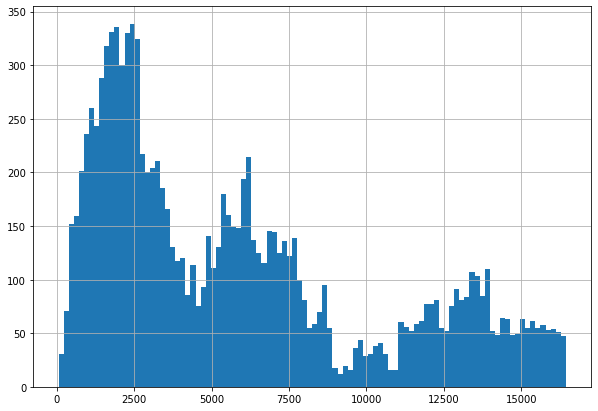

In [497]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

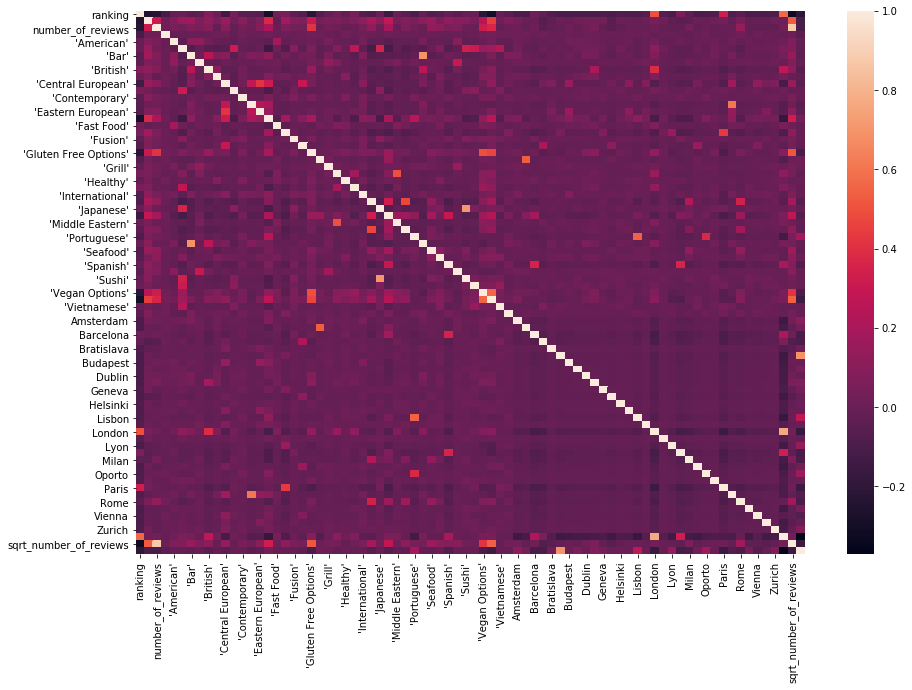

In [498]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

Clean
убираем признаки которые еще не успели обработать, 
модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим

In [499]:
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)
data.drop(columns = ['timedelta'], axis = 1, inplace=True)
data

,ranking,price_range,number_of_reviews,sample,rating,'American','Asian','Bar','Barbecue','British',...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,ranking_vs_city_count
0,12963.0,2,4.0,0,0.0,0,0,1,0,0,...,1,0,0,0,0,0,0,2148.000000,2.0,6.034916
1,106.0,2,97.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.631695,10.0,167.802500
2,810.0,2,28.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.482005,5.0,1680.480493
3,1669.0,3,202.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,8982.000000,14.0,0.185816
4,37.0,3,162.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.422428,13.0,87.588891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,500.0,2,79.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1352.000000,9.0,0.369822
49996,6341.0,2,542.0,1,3.5,1,0,1,0,0,...,1,0,0,0,0,0,0,2148.000000,23.0,2.952048
49997,1652.0,0,4.0,1,4.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0.975904,2.0,1692.789455
49998,641.0,2,70.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.798000,8.0,356.507230


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [500]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [501]:
def filter_cuisine_style(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.strip()
    x = [style.strip() for style in x.split(',')]
    x = [style for style in x if len(style) > 0]
    return x

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # переименовываем названия столбцов в исходном датасете в единый формат
    df_output.columns = ['restaurant_id','city','cuisine_style','ranking','price_range','number_of_reviews','reviews','url_ta','id_ta','sample','rating']
    # убираем не нужные для модели признаки
    df_output.drop(['restaurant_id','id_ta',], axis = 1, inplace=True)
    # задаем используемые функции и добавляем словари
    city_dict = {'London':8982,'Paris':2148,'Madrid':6642,'Barcelona':5575, 'Berlin':3769, 'Milan':1352, 'Rome':2873, 'Prague':1309, 
                 'Lisbon': 0.504718, 'Vienna':1897, 'Amsterdam': 0.821752,'Brussels': 0.174383, 'Budapest':1.752, 'Dublin': 1.388,
                 'Copenhagen':0.602481,'Athens':0.664046,'Edinburgh':0.482005, 'Zurich':0.402762, 'Oporto':0.214349,'Geneva':0.499408,
                 'Hamburg':1.899, 'Stockholm':0.975904, 'Munich':1.473, 'Warsaw':1.798, 'Krakow':0.769498,'Lyon':0.513275,'Oslo':0.681067,
                 'Helsinki':0.631695, 'Bratislava':0.422428,'Luxembourg':0.613894,'Ljubljana':0.279631}

    price_dict = {'0$':0,'$':1,'$$ - $$$':2,'$$$$':3,}


    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски и формируем промежуточные выборки для следующего шага
    df_output.number_of_reviews.fillna(0, inplace=True)
    
    df_output.price_range.fillna('0$', inplace=True)
    
    df_output.reviews.fillna(df_output.reviews.mode()[0], inplace=True)
    
    df_output.cuisine_style.fillna('Other', inplace=True)
    df_output['cuisine_style'] = df_output['cuisine_style'].apply(filter_cuisine_style)
    data_cuisine_90 = df_output.explode(column='cuisine_style')
    data_cuisine_90 = data_cuisine_90[data_cuisine_90['cuisine_style'] != 'Other']
    all_cuisine = data_cuisine_90['cuisine_style'].value_counts()
    top_cuisine = all_cuisine.head(40).index
    all_cuisine = data_cuisine_90['cuisine_style'].value_counts().index
    cuisine_to_throw_away = list(set(all_cuisine) - set(top_cuisine))

    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = df_output.join(pd.DataFrame(mlb.fit_transform(df_output.pop('cuisine_style')), index=df_output.index, columns=mlb.classes_))
    
    dummies_city = pd.get_dummies(df_output.city).rename(columns=lambda x: str(x))
    df_output = pd.concat([df_output, dummies_city], axis=1)
    
    # тут ваш код не Encoding фитчей
    df_output.price_range = df_output.price_range.replace(to_replace=price_dict)

   

    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    df_output['city_count'] = df_output.city
    df_output['city_count'] = df_output['city_count'].replace(to_replace=city_dict)  
    
    df_output['sqrt_number_of_reviews'] = round(np.sqrt(df_output.number_of_reviews[df_output.number_of_reviews >= 0]))
    df_output['ranking_vs_city_count'] = df_output['ranking']/df_output['city_count']
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(cuisine_to_throw_away, axis = 1, inplace=True)
    df_output.drop('Other', axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [502]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,ranking,price_range,number_of_reviews,sample,rating,'American','Asian','Bar','Barbecue','British',...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,ranking_vs_city_count
9035,7486.0,1,16.0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,2148.000000,4.0,3.485102
20545,8954.0,0,2.0,1,4.5,0,0,0,0,0,...,1,0,0,0,0,0,0,2148.000000,1.0,4.168529
42458,4318.0,0,9.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,6642.000000,3.0,0.650105
28866,5996.0,2,16.0,1,3.5,0,0,0,0,0,...,0,0,0,0,0,0,0,3769.000000,4.0,1.590873
24563,2465.0,2,207.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,8982.000000,14.0,0.274438
39859,3054.0,2,311.0,1,3.5,0,0,0,0,0,...,0,0,0,0,0,0,0,6642.000000,18.0,0.459801
7854,33.0,3,146.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.513275,12.0,64.293020
12236,5151.0,0,2.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,3769.000000,1.0,1.366676
20889,2158.0,2,373.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,8982.000000,19.0,0.240258
49241,1390.0,0,30.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0.504718,5.0,2754.013132


In [503]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ranking                 50000 non-null  float64
 1   price_range             50000 non-null  int64  
 2   number_of_reviews       50000 non-null  float64
 3   sample                  50000 non-null  int64  
 4   rating                  50000 non-null  float64
 5   'American'              50000 non-null  int64  
 6   'Asian'                 50000 non-null  int64  
 7   'Bar'                   50000 non-null  int64  
 8   'Barbecue'              50000 non-null  int64  
 9   'British'               50000 non-null  int64  
 10  'Cafe'                  50000 non-null  int64  
 11  'Central European'      50000 non-null  int64  
 12  'Chinese'               50000 non-null  int64  
 13  'Contemporary'          50000 non-null  int64  
 14  'Czech'                 50000 non-null

In [504]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [505]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [506]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 78), (40000, 78), (40000, 77), (32000, 77), (8000, 77))

# Model 
Сам ML

In [507]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [508]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [509]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [510]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20742687499999998


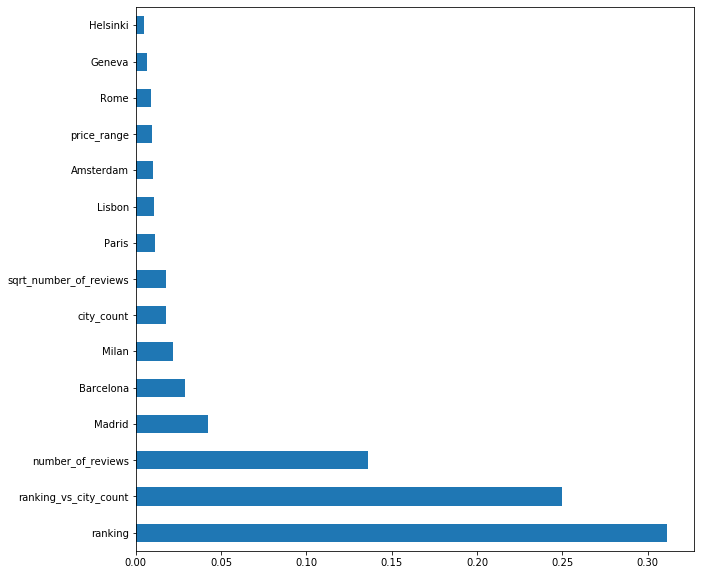

In [511]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [512]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,'American','Asian','Bar','Barbecue','British','Cafe',...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,ranking_vs_city_count
4565,580.0,1,98.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2873.000000,10.0,0.201880
3508,998.0,2,82.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.602481,9.0,1656.483773
1491,655.0,1,12.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.214349,3.0,3055.764198
5909,1232.0,2,31.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.174383,6.0,7064.908850
8389,5161.0,2,16.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8982.000000,4.0,0.574594
9460,150.0,2,157.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2148.000000,13.0,0.069832
533,742.0,0,15.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.899000,4.0,390.731964
7964,11187.0,0,14.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2148.000000,4.0,5.208101
8752,3929.0,3,2.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1309.000000,1.0,3.001528
7016,1175.0,0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.602481,1.0,1950.268971


In [513]:
test_data = test_data.drop(['rating'], axis=1)

In [514]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [515]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [516]:
predict_submission

array([3.025, 4.255, 4.545, ..., 3.02 , 4.495, 4.26 ])

In [517]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.025
1,id_1,4.255
2,id_2,4.545
3,id_3,4.315
4,id_4,4.440
5,id_5,4.630
6,id_6,1.425
7,id_7,3.060
8,id_8,4.010
9,id_9,4.735


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
